In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import random

from keras.models import load_model

import warnings
warnings.filterwarnings(action='ignore')

1/1 [==============================] - 0s 74ms/step
↓


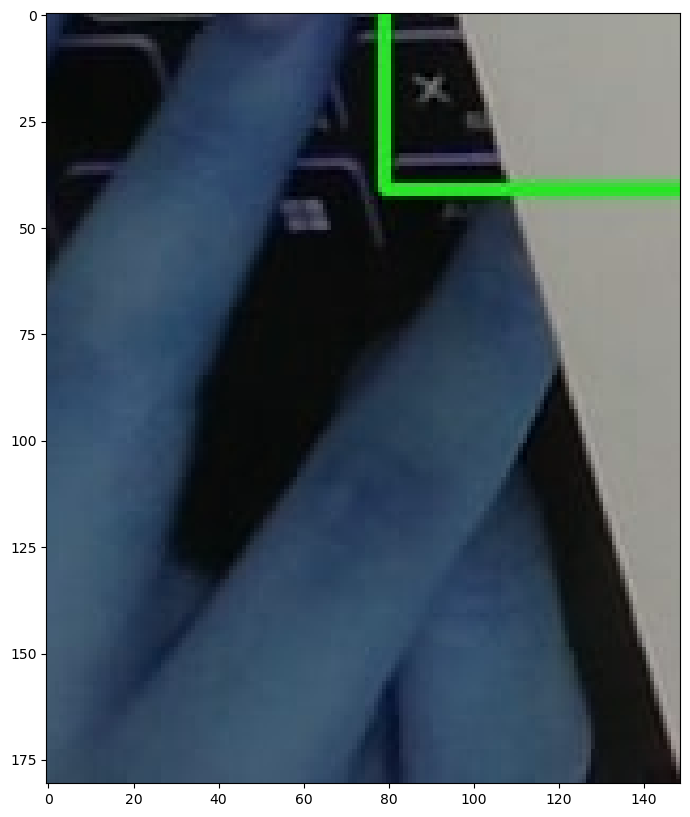

In [3]:
image_path = './images/sample2.jpg'

img_ori = cv2.imread(image_path)

height, width, channel = img_ori.shape

gray = cv2.cvtColor(img_ori, cv2.COLOR_BGR2GRAY)

img_blurred = cv2.GaussianBlur(gray, ksize=(5, 5), sigmaX=0)

img_blur_thresh = cv2.adaptiveThreshold(
    img_blurred,
    maxValue=255.0,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=19,
    C=1
)

# 컨투어
contours, _ = cv2.findContours(
    img_blur_thresh,
    mode=cv2.RETR_LIST,
    method=cv2.CHAIN_APPROX_SIMPLE
)

# 컨투어 딕셔너리
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

contours_dict = []

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(temp_result, pt1=(x,y), pt2=(x+w, y+h), color=(255,255,255), thickness=2)
    
    contours_dict.append({
        'contour': contour,
        'x': x,
        'y': y,
        'w': w,
        'h': h,
        'cx': x + (w / 2),
        'cy': y + (h / 2)
    })
    
# 이미지에 나타내기
img = cv2.imread(image_path)

MIN_AREA = 20000

possible_contours = []

cnt = 0
for d in contours_dict:
    area = d['w'] * d['h']
    
    if area > MIN_AREA:
        d['idx'] = cnt
        cnt += 1
        possible_contours.append(d)

for d in possible_contours:
    cv2.rectangle(img, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(0, 0, 0), thickness=2)
    
plt.figure(figsize=(12, 10))
plt.imshow(img, cmap='gray')


# 컨투어 별 이미지 추출
img_origin = cv2.imread(image_path)

img_list = []

for i in range(len(possible_contours)):
    img_list.append(img_origin[possible_contours[i]['y'] : possible_contours[i]['y'] + possible_contours[i]['h'], \
        possible_contours[i]['x'] : possible_contours[i]['x'] + possible_contours[i]['w']])
    
    
# 이미지 전처리
processed_img_list = []

for i in img_list:
    out = i.copy()
    out = 255 - out
    
    # 36 x 36
    output_img_36 = cv2.resize(out, (36, 36), interpolation = cv2.INTER_AREA)

    # 그레이 스케일 및 이진화
    gray_img = cv2.cvtColor(output_img_36, cv2.COLOR_BGR2GRAY)
    ret, th1 = cv2.threshold(gray_img, 125, 255, cv2.THRESH_BINARY)
    
    processed_img_list.append(th1)
    
# shape / 예측
X_test = np.array(processed_img_list)
input_shape = 1296
X_test = X_test / 255
X_test = X_test.reshape(-1, input_shape)
loaded_model = load_model('./model/best_model_01.h5')

test_pred = loaded_model.predict(X_test)

for idx, pred in enumerate(test_pred):
    if test_pred.max() in pred:
        plt.imshow(img_list[idx])
        for i, a in enumerate(pred):
            if a == pred.max():
                if i == 0:
                    print('←')
                elif i == 1:
                    print('↑')
                elif i == 2:
                    print('→')
                elif i == 3:
                    print('↓')
                

In [47]:
processed_img_list = []

for i in img_list:
    out = i.copy()
    out = 255 - out
    
    # 36 x 36
    output_img_36 = cv2.resize(out, (36, 36), interpolation = cv2.INTER_AREA)

    # 그레이 스케일 및 이진화
    gray_img = cv2.cvtColor(output_img_36, cv2.COLOR_BGR2GRAY)
    ret, th1 = cv2.threshold(gray_img, 125, 255, cv2.THRESH_BINARY)
    
    processed_img_list.append(th1)

In [48]:
X_test = np.array(processed_img_list)

In [49]:
X_test[0].shape

(36, 36)

In [50]:
input_shape = 1296

In [51]:
X_test = X_test / 255
X_test = X_test.reshape(-1, input_shape)

In [52]:
print(f"X_test_shape: {X_test.shape}")  # X_test_shape: (106, 1296)

X_test_shape: (2, 1296)


In [54]:
loaded_model = load_model('./model/best_model_01.h5')

In [55]:
test_pred = loaded_model.predict(X_test)

1/1 [==============================] - 0s 29ms/step


In [56]:
for idx, pred in enumerate(test_pred):
    if test_pred.max() in pred:
        for i, a in enumerate(pred):
            if a == pred.max():
                print(i)

0


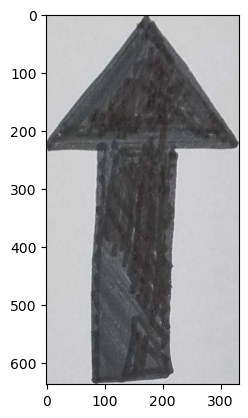

In [35]:
plt.imshow(img_list[5])